***First we will discuss in deatil about Brute-Force Matcher & then will proceed towards FLANN Based Matcher***
# Brute-Force Matcher :-

**Brute-Force matcher** is simple as it takes the **descriptor**(A feature descriptor is an algorithm which takes an image and outputs feature descriptors/feature vectors) of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.

For **BF matcher**, first we have to create the **BFMatcher object using cv2.BFMatcher()**. It takes **two optional params** :-<br>

&nbsp;&nbsp;**1 -** **normType**(It specifies the distance measurement to be used). By **default**, it is **cv2.NORM_L2**. It is good for **SIFT**, **SURF**, etc (**cv2.NORM_L1** is also there). For **binary** string based descriptors like **ORB**, **BRIEF**, **BRISK** etc, **cv2.NORM_HAMMING** should be used, which used **Hamming distance** as measurement. If **ORB** is using **VTA_K == 3 or 4**, **cv2.NORM_HAMMING2** should be used.<br>

&nbsp;&nbsp;**2 -** Boolean Variable i.e. **crossCheck** which is **false** by default. If it is **true**, **Matcher returns only those matches with value (i,j) such that i-th descriptor in set A has j-th descriptor in set B as the best match and vice-versa.** So, the two features in both sets should match each other.<br>

Once the **object** is created, two important methods are **BFMatcher.match()** & **BFMatcher.knnMatch() :-**<br>

&nbsp;&nbsp;**1.** **BFMatcher.match() -** returns the **best match.**<br> 
&nbsp;&nbsp;**2.** **BFMatcher.knnMatch() -** returns **k best matches** where **k** is **specified by the user.** It may be useful when we need to do additional work on that.<br>

Like we used **cv2.drawKeypoints()** to draw **keypoints**, **cv2.drawMatches()** helps us to draw the **matches**. It stacks(joins) two images horizontally and draw lines from first image to second image showing best matches. There is also **cv2.drawMatchesKnn** which draws all the **k best matches.** **If k=2**, it will draw **two match-lines** for **each keypoint.** So we have to pass a mask if we want to selectively draw it.<br><br>

In my last **Blog & Notebook(Some OpenCV Functions)**, I talked about various OpenCV functions including **{SIFT & SURF}**.<br><br>
Here, I am going to discuss about the following things :-<br>
**1.** **ORB (Oriented FAST and Rotated BRIEF).**<br>
**2.** Will learn How to use **BFMatcher** to match KeyPoints.<br>
&nbsp;&nbsp;&nbsp;&nbsp;**2.1.** Will use **BFMatcher.match()** along with **cv2.drawMatches().**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**2.1.1.** For this we will match similar **Keypoints**, we will get from **{SURF, SIFT & ORB}** & then will **compare all.**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**2.2.** Will use **BFMatcher.knnMatch()** along with **cv2.drawMatchesKnn().**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**2.2.1.** For this we will again match similar **Keypoints**, we will get from **{SURF, SIFT & ORB}** & then will **compare .**<br>



## Importing Baisc Required Libraries :-

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy

## 1. ORB (Oriented Fast & Rotated BRIEF) :-

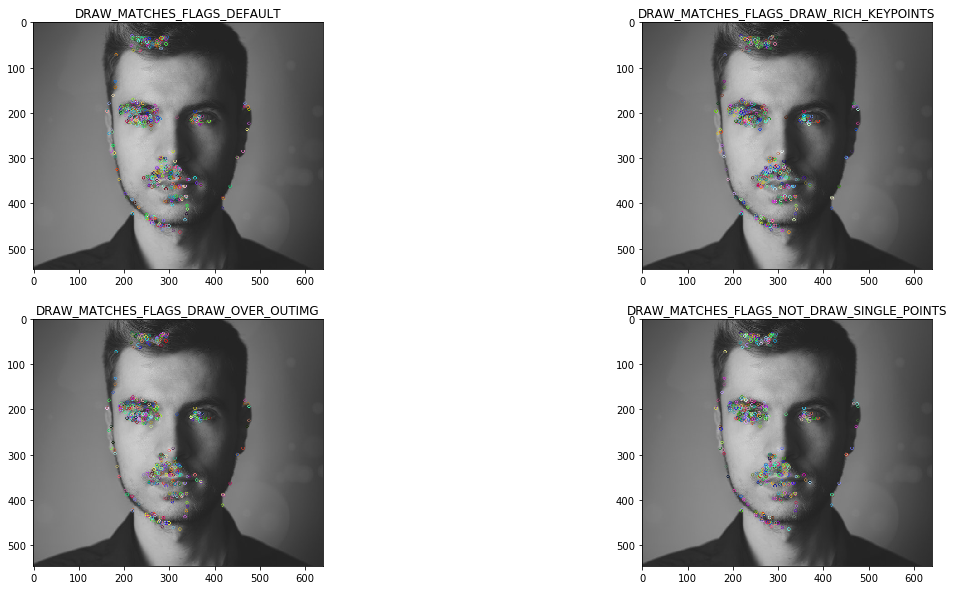

In [2]:
img = cv2.imread("images/man.jpeg", 0)  # By this 0 image will be converted into GrayScale

# Creating an ORB object
orb = cv2.ORB_create(nfeatures=500, scaleFactor=2.1)

# Let's find Keypoints & Descriptors
keypoints, descriptors = orb.detectAndCompute(img, None)

# Now, lets draw the Keypoints
key = cv2.drawKeypoints(img, keypoints, outImage=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
key1 = cv2.drawKeypoints(img, keypoints, outImage=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
key2 = cv2.drawKeypoints(img, keypoints, outImage=cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
key3 = cv2.drawKeypoints(img, keypoints, outImage=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

fig, ax = plt.subplots(2,2, figsize=(20,10))
ax[0,0].imshow(key)
ax[0,0].set_title("DRAW_MATCHES_FLAGS_DEFAULT")
ax[0,1].imshow(key1)
ax[0,1].set_title("DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS")
ax[1,0].imshow(key2)
ax[1,0].set_title("DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG")
ax[1,1].imshow(key3)
ax[1,1].set_title("DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS")
plt.show()

So, here we have got how to get the Keypoints & Descriptors of an Image.

## 2. BFMatcher :-

**If we used SURF for KeyPoints then also we should prefer cv2.NORM_L2 or cv2.NORM_L1 as suggested in OPENCV Documentation :-**<br>
**Object making of Brute-Force Matcher**<br>
bf = cv2.BFMatcher(cv2.NORM_L2/cv2.NORM_L1, crossCheck= False(default)/True)<br><br>

**If we used SIFT for KeyPoints then we should prefer cv2.NORM_L2 or cv2.NORM_L1 as suggested in OPENCV Documentation :-**<br>
**Object making of Brute-Force Matcher**<br>
bf = cv2.BFMatcher(cv2.NORM_L2/cv2.NORM_L1, crossCheck= False(default)/True)<br><br>

**If we used ORB for KeyPoints then we should prefer cv2.NORM_HAMMING or cv2.NORM_HAMMING2 as suggested in OPENCV Documentation :-**<br>
**Object making of Brute-Force Matcher**<br>
bf = cv2.BFMatcher(cv2.NORM_HAMMING/cv2.NORM_HAMMING2, crossCheck= False(default)/True)

## 2.1. BFMatcher.match() & cv2.drawMatches()

### 2.1.1.  Comparing {SURF, SIFT & ORB} & Matching KeyPoints :-
Now, lets get into some coding & match the keypoints :-

#### Speeded-Up Robust Features (SURF)

keypoints Detected from Original Image :  543
keypoints Detected from Rotational Image :  543

keypoints Matched :  503


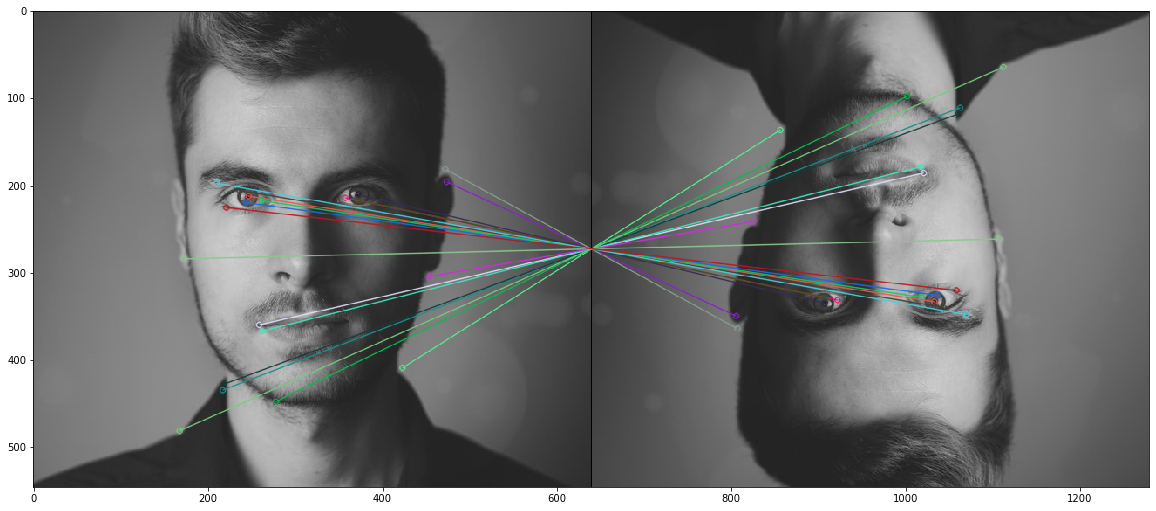

In [3]:
img1 = cv2.imread("images/man.jpeg", 0)

# Rotating the image for testing the keypoints matched accuracy :-
rows, cols = img1.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 180, 1)
img2 = cv2.warpAffine(img1, M, (cols, rows), flags=2)

# Creating SURF object
"""It doesn't have any parameter to specify maximum number of keypoints(nfeatures), so will leave it as default"""
surf = cv2.xfeatures2d.SURF_create()

key1, des1 = surf.detectAndCompute(img1, None)
key2, des2 = surf.detectAndCompute(img2, None)

# Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x: x.distance)

# Now, will finally draw the matches and then let's for now only see top 20 matches in images as per distances.
img3 = cv2.drawMatches(img1, key1, img2, key2, matches[:20], cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG, flags=2)

print("keypoints Detected from Original Image : ", len(key1))
print("keypoints Detected from Rotational Image : ", len(key2))
print("\nkeypoints Matched : ", len(matches))

plt.figure(figsize=(20,10))
plt.imshow(img3)
plt.show()

#### Scale Invariant Feature Transform (SIFT) 

keypoints Detected from Original Image :  543
keypoints Detected from Rotational Image :  544

keypoints Matched :  486


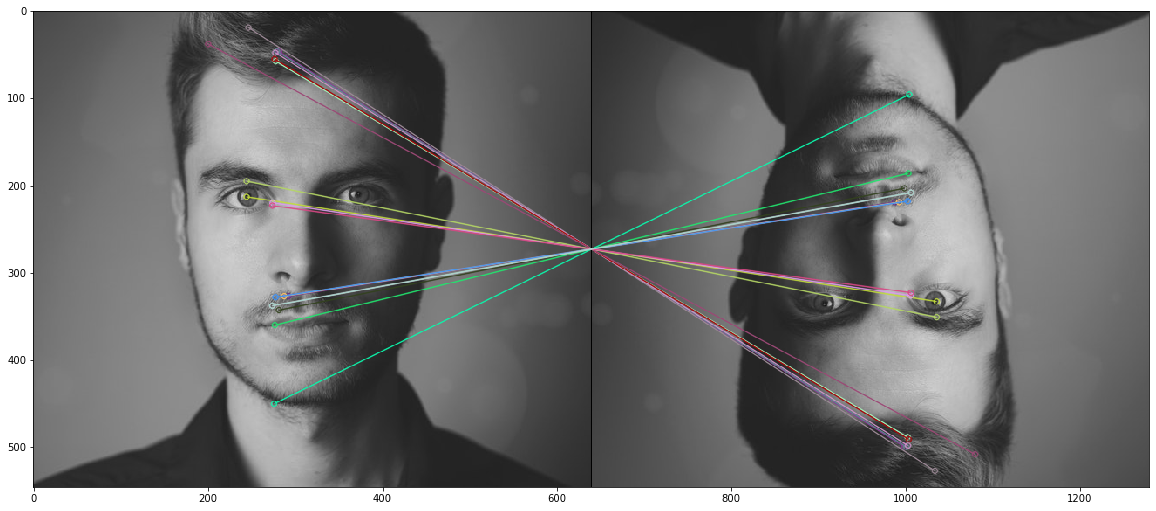

In [4]:
img1 = cv2.imread("images/man.jpeg", 0)

# Rotating the image for testing the keypoints matched accuracy :-
rows,cols = img1.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2), 180, 1)
img2 = cv2.warpAffine(img1, M, (cols,rows), flags=2)

# Creating SIFT object
"""In SURF it provided us 543 keypoints & for comparison only I specified nfeatures = 543 in SIFT"""
sift = cv2.xfeatures2d.SIFT_create(543, 12)

# Let's find out the keypoints and the descriptors
key1, des1 = sift.detectAndCompute(img1, None)
key2, des2 = sift.detectAndCompute(img2, None)

# Creating Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)  # This will match the keypoints which we get from both images
matches = sorted(matches,key=lambda x: x.distance)  # Here, we just sorted the matches according to the distances.

# Now, will finally draw the matches and then let's for now only see top 20 matches in images as per distances.
img3 = cv2.drawMatches(img1, key1, img2, key2, matches[:20], outImg=cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG, flags=2)

print("keypoints Detected from Original Image : ", len(key1))
print("keypoints Detected from Rotational Image : ", len(key2))
print("\nkeypoints Matched : ", len(matches))

plt.figure(figsize=(20,10))
plt.imshow(img3)
plt.show()

#### Oriented Fast & Rotated BRIEF (ORB)

keypoints Detected from Original Image :  543
keypoints Detected from Rotational Image :  543

keypoints Matched :  454


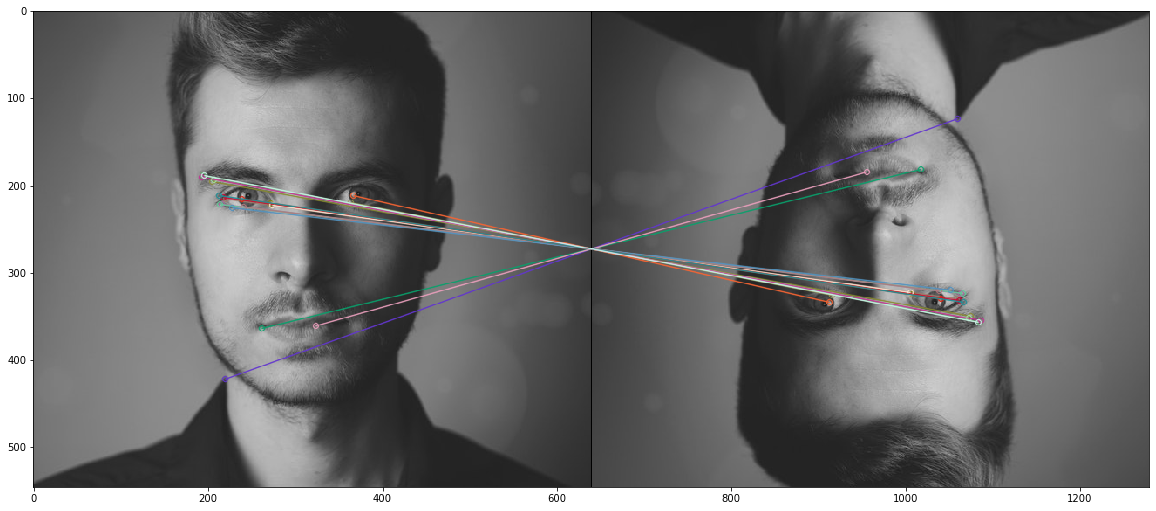

In [5]:
img1 = cv2.imread("images/man.jpeg", 0)

# Rotating the image for testing the keypoints matched accuracy :-
rows, cols = img1.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 180, 1)
img2 = cv2.warpAffine(img1, M, (cols, rows), flags=2)

# Creating ORB object
"""In SURF it provided us 543 keypoints & for comparison only I specified nfeatures = 543 in ORB"""
orb = cv2.ORB_create(543)  

key1, des1 = orb.detectAndCompute(img1, None)
key2, des2 = orb.detectAndCompute(img2, None)

# Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING2, crossCheck=True)

matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x: x.distance)

# Now, will finally draw the matches and then let's for now only see top 20 matches in images as per distances.
img3 = cv2.drawMatches(img1, key1, img2, key2, matches[:20], cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, flags=2)

print("keypoints Detected from Original Image : ", len(key1))
print("keypoints Detected from Rotational Image : ", len(key2))
print("\nkeypoints Matched : ", len(matches))

plt.figure(figsize=(20,10))
plt.imshow(img3)
plt.show()

### Comparing All The Above :-
**SURF :-**<br>
keypoints Detected from Original Image :  543<br>
keypoints Detected from Rotational Image :  543<br>
keypoints Matched :  503<br><br>
**SIFT :-**<br>
keypoints Detected from Original Image :  543<br>
keypoints Detected from Rotational Image :  544<br>
keypoints Matched :  486<br><br>
**ORB :-**<br>
keypoints Detected from Original Image :  543<br>
keypoints Detected from Rotational Image :  543<br>
keypoints Matched :  454<br><br>
**So, I think I see a winner & that is SURF as it matched maximum keypoints of image out of 543 detected keypoints.**<br>
So, according to me if we use cv2.BFMatcher.match() & cv2.drawMatches() then we should prefer SURF for finding KeyPoints & Descriptors. But we all know that one KeyPoints Finding Algorithm is never best for all kind of images, every image requires different-different algorithms to work. So, it is best to compare the algorithm on an image and then decide which one is best for that one particular image.

##  2.2. BFMatcher.knnMatch() & cv2.drawMatchesKnn()
***NOTE :-***<br>
Here, the algorithm will provide us the **best k number of matches for each descriptor.**<br><br>
So, if we use **BFMatcher.knnMatch()** then we cannot enable the crossCheck parameter of **cv2.BFMatcher()** because crossCheck also returns only the best matched KeyPoints for each descriptor. Therefore, it will lead to overlap of same argument & will get this error :-<br>
**error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\core\src\batch_distance.cpp:265: error: (-215:Assertion failed) K == 1 && update == 0 && mask.empty() in function 'cv::batchDistance'**.<br><br>
So, we will have to make **crossCheck = False** or will have to **use the other function of BFMatcher** like we studied above **{BFMatcher.match() & cv2.drawMatches()}.**

### 2.1.2. Comparing {SURF, SIFT & ORB} & Matching KeyPoints :- 

#### Speeded-Up Robust Features (SURF)

keypoints Detected from Original Image :  543
keypoints Detected from Rotational Image :  543

keypoints Matched :  543


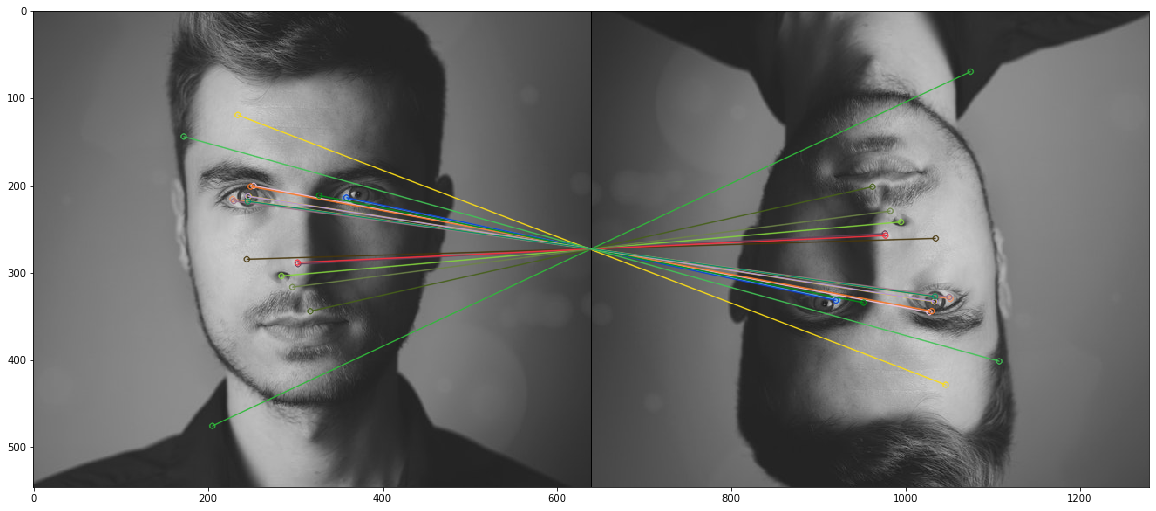

In [45]:
img1 = cv2.imread("images/man.jpeg", 0)

# Rotating the image for testing the keypoints matched accuracy :-
rows, cols = img1.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 180, 1)
img2 = cv2.warpAffine(img1, M, (cols, rows), flags=2)

# Creating SURF object
"""It doesn't have any parameter to specify maximum number of keypoints(nfeatures), so will leave it as default"""
surf = cv2.xfeatures2d.SURF_create()

key1, des1 = surf.detectAndCompute(img1, None)
key2, des2 = surf.detectAndCompute(img2, None)

# Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

matches = bf.knnMatch(des1, des2, k=2)


# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# Now, will finally draw the matches and then let's for now only see top 20 matches in images as per distances.
img3 = cv2.drawMatchesKnn(img1, key1, img2, key2, good[:20], cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG, flags=2)

print("keypoints Detected from Original Image : ", len(key1))
print("keypoints Detected from Rotational Image : ", len(key2))
print("\nkeypoints Matched : ", len(matches))

plt.figure(figsize=(20,10))
plt.imshow(img3)
plt.show()

#### Scale Invariant Feature Transform (SIFT)

keypoints Detected from Original Image :  543
keypoints Detected from Rotational Image :  544

keypoints Matched :  543


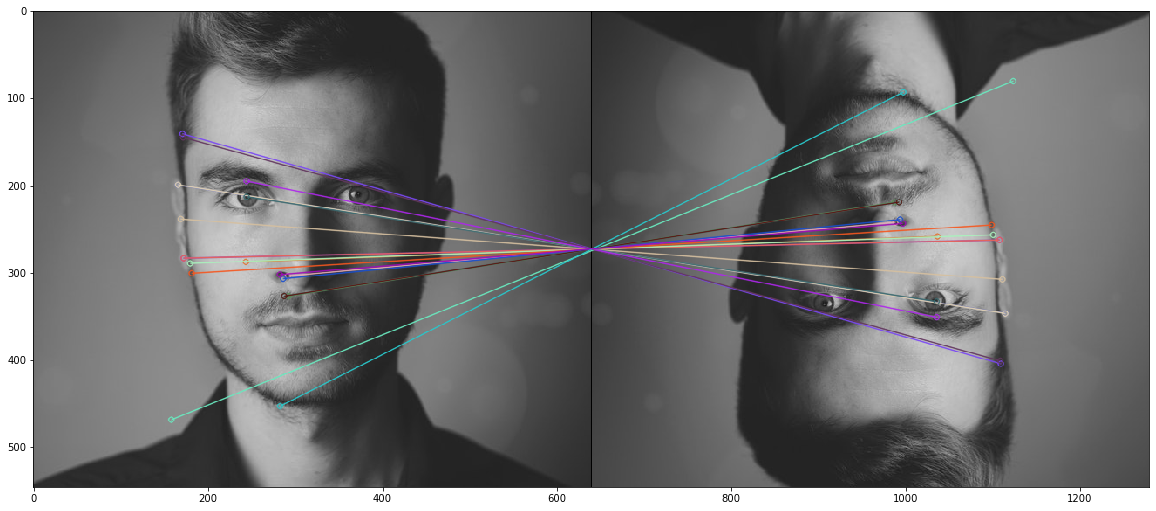

In [80]:
img1 = cv2.imread("images/man.jpeg", 0)

# Rotating the image for testing the keypoints matched accuracy :-
rows,cols = img1.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2), 180, 1)
img2 = cv2.warpAffine(img1, M, (cols,rows), flags=2)

# Creating SIFT object
"""In SURF it provided us 543 keypoints max on default & for comparison only I specified nfeatures = 543 in SIFT"""
sift = cv2.xfeatures2d.SIFT_create(543, 12)  # Overall with these parameters this algo gave 598 features

# Let's find out the keypoints and the descriptors
key1, des1 = sift.detectAndCompute(img1, None)
key2, des2 = sift.detectAndCompute(img2, None)

# Creating Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
matches = bf.knnMatch(des1, des2, k=2)  # This will match the keypoints which we get from both images

good = []
for (m,n) in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# Now, will finally draw the matches and then let's for now only see top 20 matches in images as per distances.
img3 = cv2.drawMatchesKnn(img1, key1, img2, key2, good[:20], outImg=cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG, flags=2)

print("keypoints Detected from Original Image : ", len(key1))
print("keypoints Detected from Rotational Image : ", len(key2))
print("\nkeypoints Matched : ", len(matches))

plt.figure(figsize=(20,10))
plt.imshow(img3)
plt.show()

#### Oriented Fast & Rotated BRIEF (ORB)

keypoints Detected from Original Image :  543
keypoints Detected from Rotational Image :  543

keypoints Matched :  543


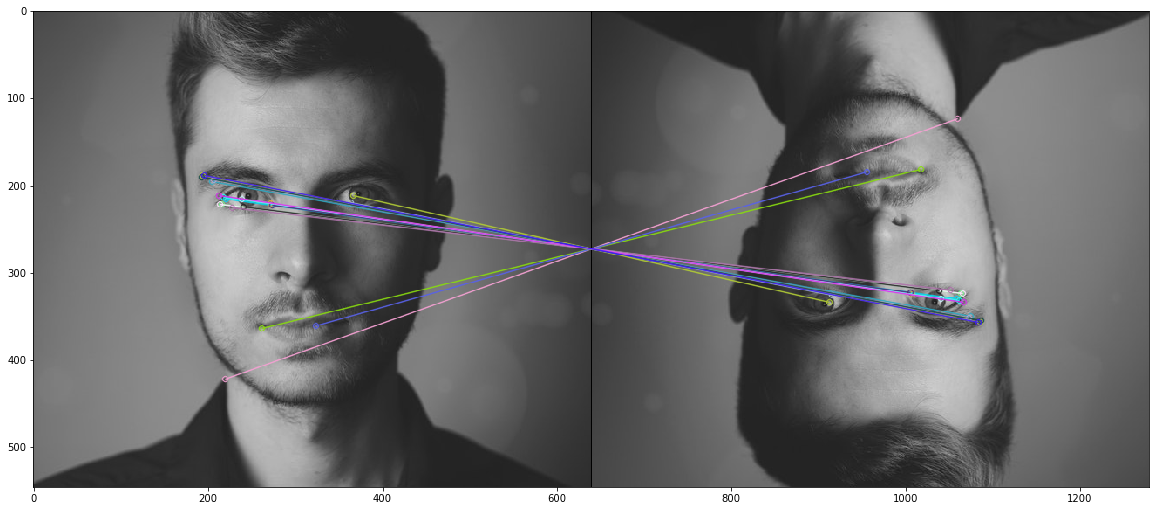

In [81]:
img1 = cv2.imread("images/man.jpeg", 0)

# Rotating the image for testing the keypoints matched accuracy :-
rows,cols = img1.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2), 180, 1)
img2 = cv2.warpAffine(img1, M, (cols,rows), flags=2)

# Creating SIFT object
"""In SURF it provided us 543 keypoints max on default & for comparison only I specified nfeatures = 543 in ORB"""
orb = cv2.ORB_create(543, 1.2) # Overall with these parameters this algo gave 663 features

# Let's find out the keypoints and the descriptors
key1, des1 = orb.detectAndCompute(img1, None)
key2, des2 = orb.detectAndCompute(img2, None)

# Creating Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
matches = bf.knnMatch(des1, des2, k=2)  # This will match the keypoints which we get from both images

good = []
for (m,n) in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# Now, will finally draw the matches and then let's for now only see top 20 matches in images as per distances.
img3 = cv2.drawMatchesKnn(img1, key1, img2, key2, good[:20], outImg=cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG, flags=2)

print("keypoints Detected from Original Image : ", len(key1))
print("keypoints Detected from Rotational Image : ", len(key2))
print("\nkeypoints Matched : ", len(matches))

plt.figure(figsize=(20,10))
plt.imshow(img3)
plt.show()

### Comparing All The Above :-
**SURF :-**<br>
keypoints Detected from Original Image :  543<br>
keypoints Detected from Rotational Image :  543<br>
keypoints Matched :  543<br><br>
**SIFT :-**<br>
keypoints Detected from Original Image :  543<br>
keypoints Detected from Rotational Image :  544<br>
keypoints Matched :  543<br><br>
**ORB :-**<br>
keypoints Detected from Original Image :  543<br>
keypoints Detected from Rotational Image :  543<br>
keypoints Matched :  543<br><br>
Here, I think we can't say anything about any winner as all have performed so well.<br>
But when it comes to looking at the above images which shows us the matching of Keypoints then I think **ORB** here performed **slightly better** because in **top 20 keypoints** it matched the Keypoints of **eyes & lips first.** And this particular thing can be very useful many a times. But still algorithms performance depends on the type of image it gets. So, we should always compare all the algorithms before deciding the best one.

# FLANN Based Matcher :-

**FLANN** stands for **Fast Library for Approximate Nearest Neighbors.** It contains a **collection of algorithms** optimized for **fast nearest neighbor search** in **large datasets** and for **high dimensional features.** It works more **faster than BFMatcher for large datasets.** So, this means that **FLANN Based Matcher Algorithm** is specially for **big data-sets** and is much **faster and advanced than BFMatcher.**<br><br>

For **FLANN based matcher**, we need to pass **two dictionaries** which specifies the **algorithm** to be used, its related **parameters etc.**<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;**1.** **IndexParams =>** **index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)**<br>
If we use **ORB**, we can pass these as **IndexParams:-**<br>
**index_params= dict(algorithm = FLANN_INDEX_LSH, table_number = 6, key_size = 12, multi_probe_level = 1)**<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;**2.** **SearchParams =>** It specifies the number of times the trees in the index should be recursively traversed(Traversing a tree involves iterating over all nodes in some manner). Higher values gives better precision, but also takes more time. If you want to change the value pass this :-<br>
**search_params = dict(checks=100)**<br><br>
**With all these basic understanding, we are good to go now.**

***Scale Invariant Feature Transform (SIFT)***

keypoints Detected from Original Image :  543
keypoints Detected from Rotational Image :  544

keypoints Matched :  543


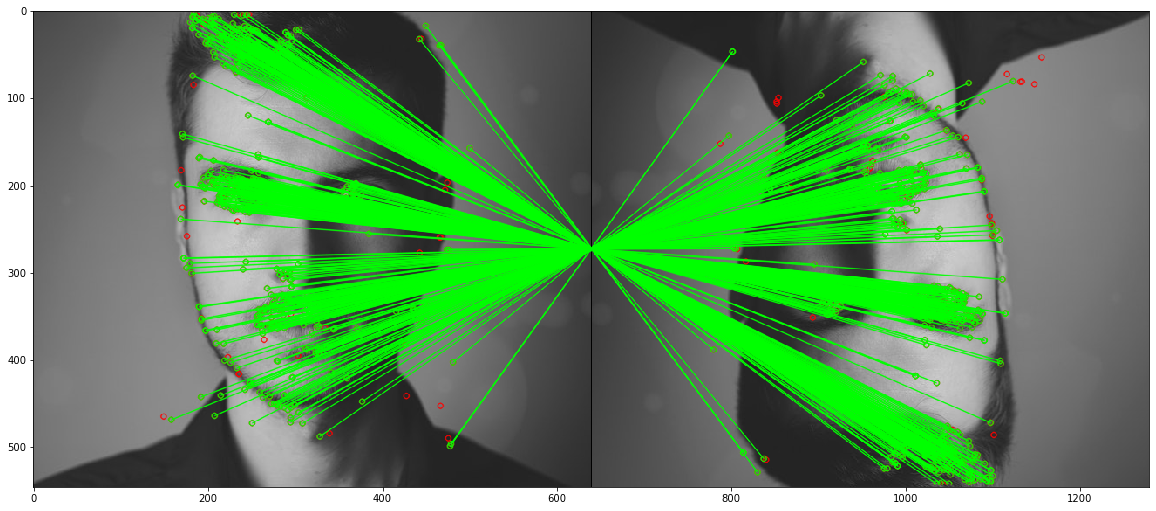

In [90]:
img1 = cv2.imread("images/man.jpeg",0) # queryImage

# Rotating the image for testing the keypoints matched accuracy :-
rows,cols = img1.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2), 180, 1)
img2 = cv2.warpAffine(img1, M, (cols,rows), flags=2)

# Initiate SIFT detector
sift = cv2.xfeatures2d_SIFT.create(543, 12)  # another way to create SIFT object

# lets find the keypoints and descriptors with SIFT
key1, des1 = sift.detectAndCompute(img1,None)
key2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters :-
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# we want to draw only good matches,so will create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):  # enumerate funtion keeps a count of iterations
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,key1,img2,key2,matches,None,**draw_params)

print("keypoints Detected from Original Image : ", len(key1))
print("keypoints Detected from Rotational Image : ", len(key2))
print("\nkeypoints Matched : ", len(matches))

plt.figure(figsize=(20,10))
plt.imshow(img3)
plt.show()

***Speeded-Up Robust Features (SURF)***

keypoints Detected from Original Image :  543
keypoints Detected from Rotational Image :  543

keypoints Matched :  543


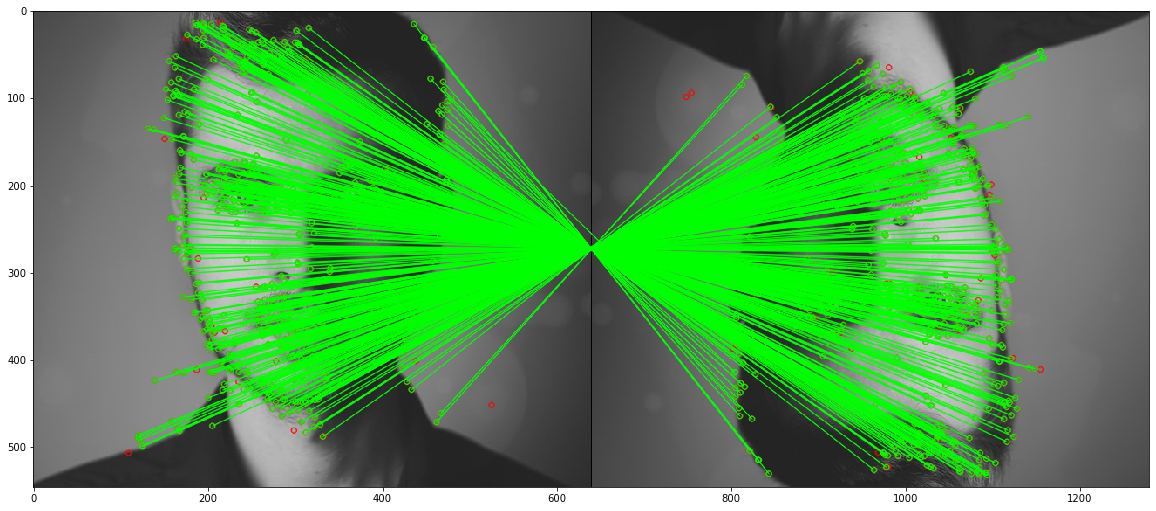

In [89]:
img1 = cv2.imread("images/man.jpeg",0)          # queryImage

# Rotating the image for testing the keypoints matched accuracy :-
rows,cols = img1.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2), 180, 1)
img2 = cv2.warpAffine(img1, M, (cols,rows), flags=2)

# Initiate SURF detector
surf = cv2.xfeatures2d_SURF.create()

# find the keypoints and descriptors with SIFT
key1, des1 = surf.detectAndCompute(img1,None)
key2, des2 = surf.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,key1,img2,key2,matches,None,**draw_params)

print("keypoints Detected from Original Image : ", len(key1))
print("keypoints Detected from Rotational Image : ", len(key2))
print("\nkeypoints Matched : ", len(matches))

plt.figure(figsize=(20,10))
plt.imshow(img3,)
plt.show()

### Comparing All The Above :-
**SURF :-**<br>
keypoints Detected from Original Image :  543<br>
keypoints Detected from Rotational Image :  543<br>
keypoints Matched :  543<br><br>
**SIFT :-**<br>
keypoints Detected from Original Image :  543<br>
keypoints Detected from Rotational Image :  544<br>
keypoints Matched :  543<br><br>
Here, I think I will choose SURF Keypoints Detector as it didn't just found only the Keypoints & Descriptors of eyes & lips but it found the Keypoints & Descriptors of whole face which is beautiful work done by SURF in this image.